In [1]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.feature_selection import VarianceThreshold 
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

In [2]:
workload_data = pd.read_csv(index_col=0, filepath_or_buffer='data.csv')
labeled_data = pd.read_csv(index_col=0, filepath_or_buffer='labels.csv')

In [3]:
# Quick look at what we're working with
#print(workload_data.head())
unique = np.unique(labeled_data)
# Check how many labels there are
print(len(unique))
labeled_data_items = labeled_data.values.flatten()

# Inserting the labels into a dict for easy access
label_indices = dict()
for item in unique:
    indices = [idx for idx, label in enumerate(labeled_data_items) if item == label]
    label_indices[item] = indices







5


Q1.1 Task 1:
- Are there missing values? Look on their website of the data to see how missing values are coded

Answer: It says on the website that the missing values are "N/A", but there aren't any (which can be seen in the code below)
- Compute the means and variances of the features (visualise in a histogram or with a kernel density estimate). Do they vary widely?

Answer: They do vary quite a lot yes, however they both vary in mean quite normally, and for variance quite logarithmic.
- Are there constant features?

Answer: There are 267 columns with a variance of 0 (where they are full of 0s) and 14944 columns with a variance of less than 2.

In [4]:
contains_missing_values = workload_data.isna()
columns_with_missing_values = 0
for column_name in workload_data.columns: 
    if sum(contains_missing_values[column_name]) > 0:
        columns_with_missing_values += 0
print(f'Total number of columns: {len(workload_data.columns)}')
print(f'Amount of columns with missing values: {columns_with_missing_values}')

means = workload_data.mean()
variances = workload_data.var()
n_of_constant_values = variances[variances == 0]
n_of_low_var_values = variances[variances < 2]
print(f'Number of columns with variance = 0: {len(n_of_constant_values)} st')
print(f'Number of columns with variance < 2: {len(n_of_low_var_values)} st')
print(f'Amount of columns that are completely full of 0s: {sum([1 for x in means if x == 0])}')
print(f'There are about 15000 columns below a variance of 2, so we will remove all columns below a variance of 2 later to get our refined dataset')

Total number of columns: 20531
Amount of columns with missing values: 0
Number of columns with variance = 0: 267 st
Number of columns with variance < 2: 14944 st
Amount of columns that are completely full of 0s: 267
There are about 15000 columns below a variance of 2, so we will remove all columns below a variance of 2 later to get our refined dataset


In [5]:
for column_name in workload_data.columns: 
    if sum(contains_missing_values[column_name]) > 0:
        print(f'{column_name=}')
print(f'No missing values, all gene_values are numeric values')
means = workload_data.mean()
variances = workload_data.var()
variance_threshold = 2
n_of_low_var_values = variances[variances < variance_threshold]
print(f'Number of columns with variance < 2: {len(n_of_low_var_values)} st')
print(f'There are about 15000 columns below a variance of 2, so we will reduce all columns below a variance of 2 later to get our refined dataset')

No missing values, all gene_values are numeric values
Number of columns with variance < 2: 14944 st
There are about 15000 columns below a variance of 2, so we will reduce all columns below a variance of 2 later to get our refined dataset


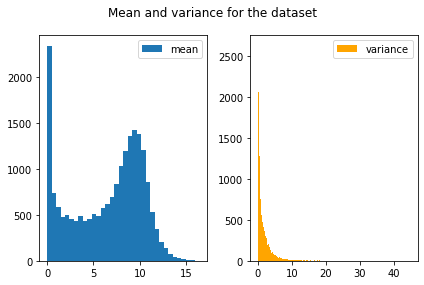

They do vary quite widely yes
Mean might be built up of two distributions, exponantial and normal with mean around 9


In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for the dataset')
ax1.hist(means, bins='auto', label='mean')
ax2.hist(variances, bins='auto', label='variance', color='orange')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()
print(f'They do vary quite widely yes')
print(f'Mean might be built up of two distributions, exponantial and normal with mean around 9')

Q1.1 Task 2:

In [7]:
trimmed_data = workload_data.copy()
data_columns = trimmed_data.columns
selector = VarianceThreshold(threshold=variance_threshold)
a = len(n_of_low_var_values)
b = len(data_columns)
print(a)
print(b)
print(b-a)
print(len(workload_data))

# rename them with same index and column names
columns_data = [f'gene_{i}' for i in range(1, 5580)] # where does this number come from? Should be 5587?
rows_data = [f'sample_{i}' for i in range(1, 802)] # should be 801?
trimmed_data = pd.DataFrame(selector.fit_transform(trimmed_data), columns=columns_data, index=rows_data)

        

14944
20531
5587
801


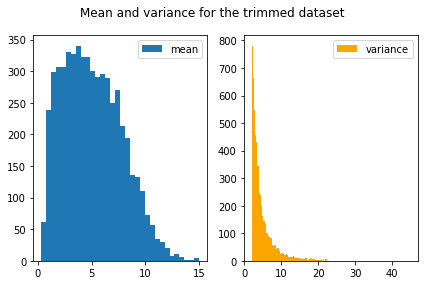

They do look alot better right now, gaussian and logarithmic


In [8]:
means = trimmed_data.mean()
variances = trimmed_data.var()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for the trimmed dataset')
ax1.hist(means, bins='auto', label='mean')
ax2.hist(variances, bins='auto', label='variance', color='orange')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()
print(f'They do look alot better right now, gaussian and logarithmic')
# Is it desirable to normalise the variance or do you want it to be log

C:\Users\rasmu\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


-1.7000494173481126e-18 0.9993755853278152


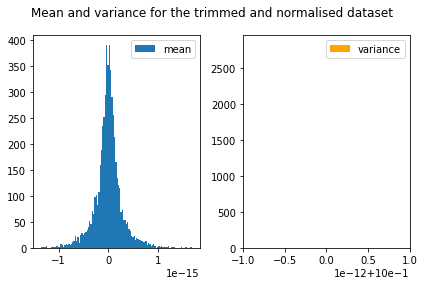

They do look very much "normalised", guess we will keep both and check


In [36]:
# Plot a normalised version to check if needed

col_centered_df = trimmed_data - trimmed_data.mean()
# centered_df = row_centered_df - row_centered_df.mean(axis=0)
normalized_df = col_centered_df/col_centered_df.std()
# Just checking it works
print(np.mean(np.mean(normalized_df)), np.mean(np.std(normalized_df)))

means = normalized_df.mean()
variances = normalized_df.var()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for the trimmed and normalised dataset')
ax1.hist(means, bins='auto', label='mean')
ax2.hist(variances, bins='auto', label='variance', color='orange')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()
print(f'They do look very much "normalised", guess we will keep both and check')


In [47]:
print(col_centered_df.loc['sample_1'].mean())

0.3186971496549144


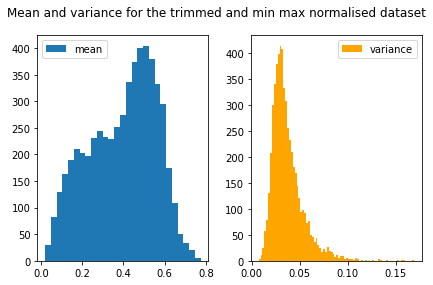

The min max version looks very similar to the original, might be an indication its not really needed


In [10]:
# Checking for max-min normalizing as well
min_max_df=(trimmed_data-trimmed_data.min())/(trimmed_data.max()-trimmed_data.min())

means = min_max_df.mean()
variances = min_max_df.var()

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Mean and variance for the trimmed and min max normalised dataset')
ax1.hist(means, bins='auto', label='mean')
ax2.hist(variances, bins='auto', label='variance', color='orange')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()
print(f'The min max version looks very similar to the original, might be an indication its not really needed')

In [11]:
n_components = 5
pca = PCA(n_components)
principalComponents = pca.fit_transform(normalized_df)
print(principalComponents.shape)

(801, 5)


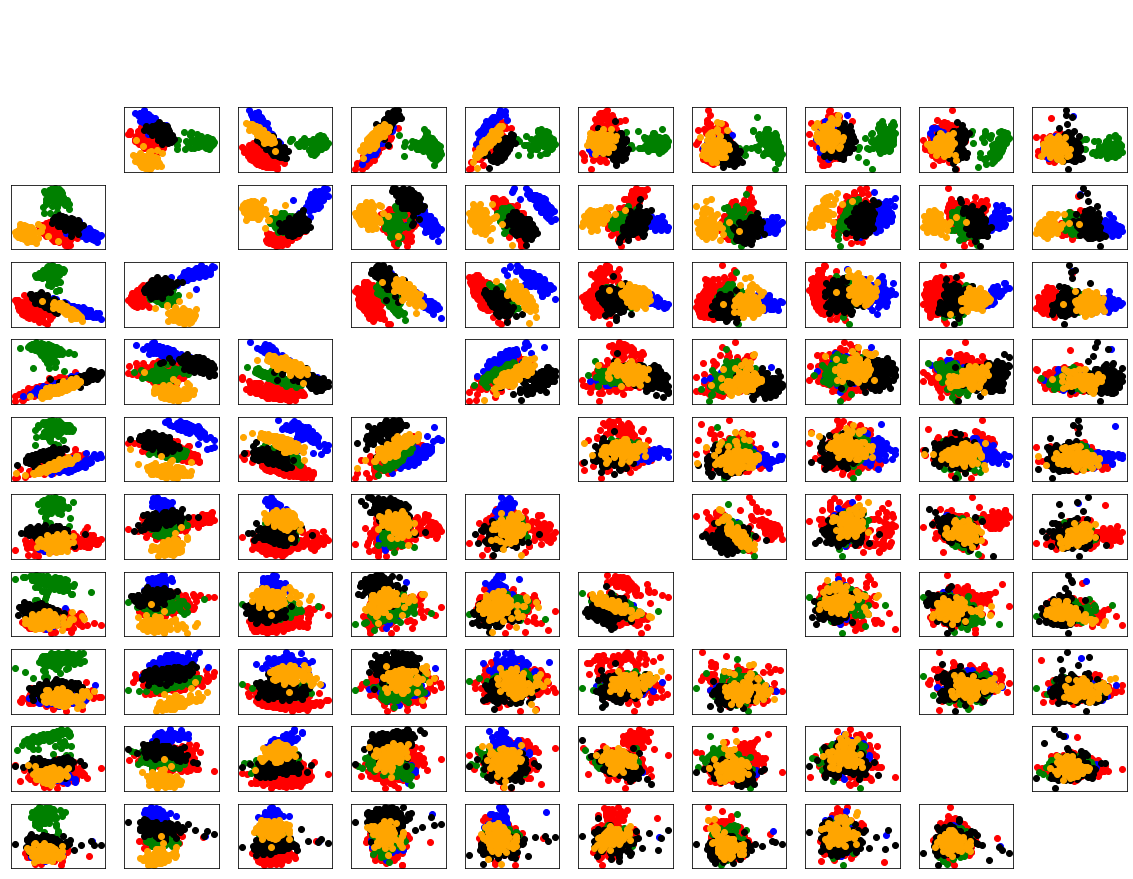

Here we can see that there are some clustered areas, up until about 5 there are some seperation, after that there is mostly just a blur


In [37]:

fig = plt.figure(figsize=(20,14))
plt.suptitle(f'{n_components} PCA analysis', color='White')
axes = fig.subplots(nrows=n_components, ncols=n_components)
colors = ['red', 'blue', 'green', 'black', 'orange']

for x_index in range(n_components):
    for y_index in range(n_components):
        for i, value in enumerate(label_indices.values()):
            if x_index == y_index:
                axes[x_index, y_index].set_axis_off()
            else:
                axes[x_index, y_index].scatter(principalComponents[value, x_index], principalComponents[value, y_index], color=colors[i])
        axes[x_index, y_index].set_yticks(())
        axes[x_index, y_index].set_xticks(())
        #axes[x_index, y_index].set_xlabel(f'Principal component {x_index+1}', color='White') # <- Change the color before submission
        #axes[x_index, y_index].set_ylabel(f'Principal component {y_index+1}', color='White')

#plt.tight_layout()
plt.show()
print('Here we can see that there are some clustered areas, up until about 5 there are some seperation, after that there is mostly just a blur')

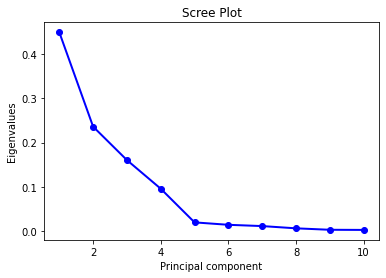

Not really sure what we're suppose to conclude here, HELP FREDRIK, guess there are 2 clear elbows at 2 and 5, 5 will probably be pretty good


In [13]:
# Doing the scree plot for 10 values 
n_components = 10
pca = PCA(n_components)
principalComponents = pca.fit_transform(normalized_df)

PC_values = np.arange(pca.n_components) + 1
N = np.matrix(principalComponents.T)*np.matrix(principalComponents)
A, B, C = np.linalg.svd(N)
eigen_values = B**2/(np.sum(B**2))
plt.plot(PC_values, eigen_values, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.show()
print("Not really sure what we're suppose to conclude here, HELP FREDRIK, guess there are 2 clear elbows at 2 and 5, 5 will probably be pretty good")
# Säker på att du plottat rätt? På hennes slide verkar det som att "typical selection rule" är att ta med PC
# som ger högre eigenvalue än 1







In [55]:
# sigma = normalized_df.cov
# beräkningar från lecture 5 sida 6/21
n = len(normalized_df)
sigma_hat = (1/(n-1))*np.matrix(col_centered_df.T)*np.matrix(col_centered_df)
sigma_hat_norm = (1/(n-1))*np.matrix(normalized_df.T)*np.matrix(normalized_df)
Rn, Dn, RnT = np.linalg.svd(sigma_hat_norm)
R, D, RT = np.linalg.svd(sigma_hat)
# print(sigma_hat.diagonal().flatten())
# diag = np.diagonal(sigma_hat)
lambn = []
for d in Dn:
    # print(d)
    lambn.append(d**2/(n-1))
lamb = []
for d in D:
    # print(d)
    lamb.append(d**2/(n-1))
    
lamb.sort(reverse=True)
lambn.sort(reverse=True)
print(lamb[0:15])
print(lambn[0:15])



[29184.820456514462, 11364.077061316755, 9537.13054461282, 4536.760297014285, 883.5300384342577, 635.8106508857711, 319.28634329802003, 191.6667411649779, 144.5773829070747, 104.36281810849172, 83.89129773004244, 50.09535579315691, 47.26238726684343, 37.85450638433339, 32.68780674795009]
[912.2790273833645, 479.6846728440295, 326.3411795099421, 195.09794731169714, 40.87683372648565, 29.74806072237037, 23.905022199726687, 13.59657258232585, 6.966665298927115, 6.331888913054233, 4.158553901730998, 2.5605430953182786, 2.176538529826857, 1.8923439565459343, 1.6836415998977012]


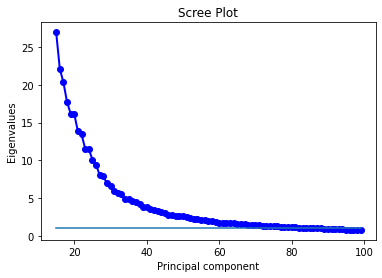

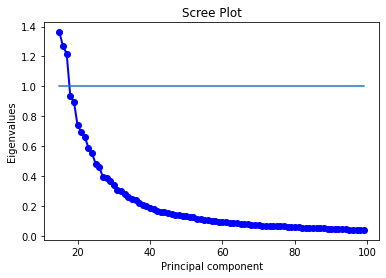

In [73]:
# new cell becuase svd calculations take long time
a = 15
b = 100
lamb_trimmed = lamb[a:b]
lambn_trimmed = lambn[a:b]

plt.plot(range(a,len(lamb_trimmed)+a), lamb_trimmed, 'o-', linewidth=2, color='blue')
plt.plot(range(a,len(lamb_trimmed)+a), np.ones(len(lamb_trimmed)))
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.show()

plt.plot(range(a,len(lambn_trimmed)+a), lambn_trimmed, 'o-', linewidth=2, color='blue')
plt.plot(range(a,len(lambn_trimmed)+a), np.ones(len(lambn_trimmed)))
plt.title('Scree Plot')
plt.xlabel('Principal component')
plt.ylabel('Eigenvalues')
plt.show()
# Vettefan om det här är rätt heller. Ska man gå efter elbow så blir det likt ditt.
# Men ska man gå efter att man ska passera 1 blir det väldigt många fler än 5

Q1.2 Task 4

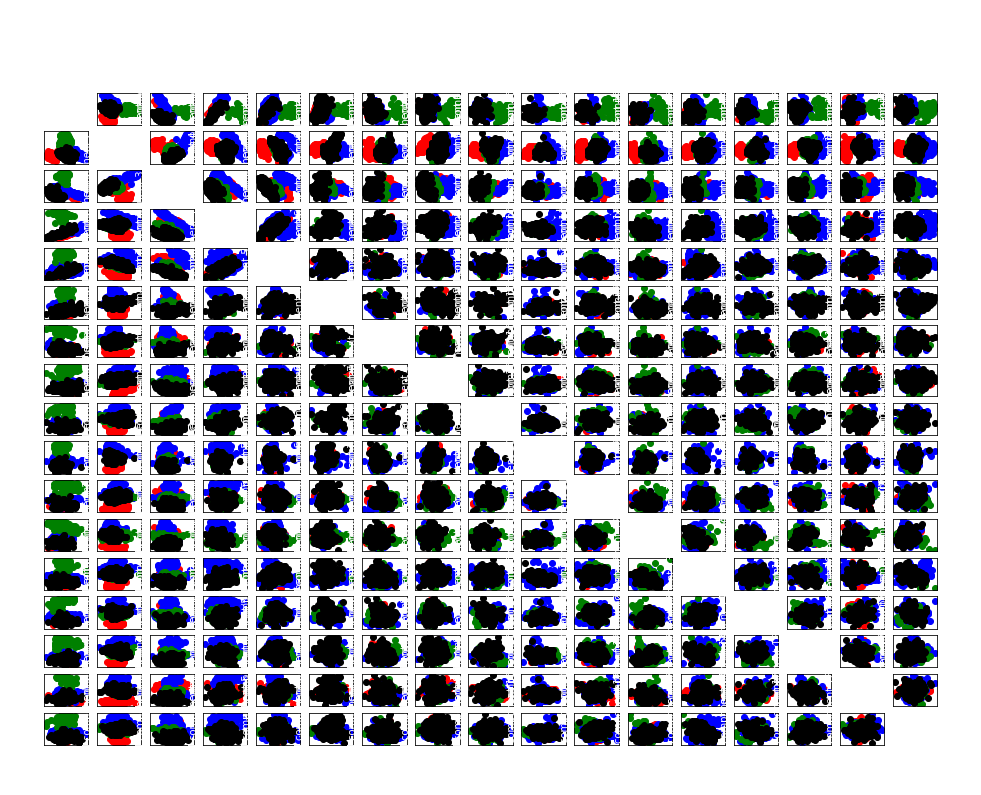

In [101]:
n_components = 17
pca = PCA(n_components)
principalComponents = pca.fit_transform(normalized_df)

n_of_clusters = 4
KM_model = KMeans(n_clusters=n_of_clusters)
KM_model.fit(principalComponents)
prediction = KM_model.predict(principalComponents)

if n_components > 2:
    fig = plt.figure(figsize=(16,12))
    plt.suptitle(f'{n_components=} KM Clustering ', color='White')
    axes = fig.subplots(nrows=n_components, ncols=n_components)

    for x_index in range(n_components):
        for y_index in range(n_components):
            for cluster in range(n_of_clusters):
                cluster_indices = [idx for idx, label in enumerate(prediction) if cluster == label]
                if x_index == y_index:
                    axes[x_index, y_index].set_axis_off()
                else:
                    axes[x_index, y_index].scatter(principalComponents[cluster_indices, x_index], principalComponents[cluster_indices, y_index], color=colors[cluster])
            axes[x_index, y_index].set_yticks(())
            axes[x_index, y_index].set_xticks(())
            axes[x_index, y_index].set_xlabel(f'Principal component {x_index+1}', color='White') # <- Change the color before submission
            axes[x_index, y_index].set_ylabel(f'Principal component {y_index+1}', color='White')
    plt.show()
else:
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
    y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = KM_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(principalComponents[:, 0], principalComponents[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X
    centroids = KM_model.cluster_centers_
    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker="x",
        s=169,
        linewidths=3,
        color="w",
        zorder=10,
    )
    plt.title(
        "K-means clustering on the digits dataset (PCA-reduced data, dim 2)\n"
        "Centroids are marked with white cross", color='White' # <- Change this before turning in, otherwise this text wille be invisible (unless they run darkmode)
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()




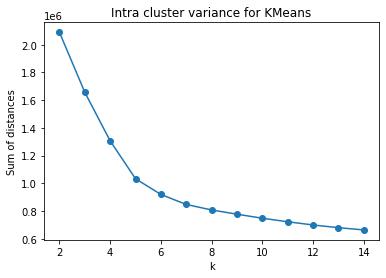

In [102]:
# Calculate the intra cluster variance for a range of cluster sizes and plot them (disclose which PCA size we use)
n_of_runs = 10
largest_cluster = 15
cluster_sizes = range(2, largest_cluster)
variance_sizes = np.zeros(len(cluster_sizes))
for _ in range(n_of_runs):
    for i, n_of_clusters in enumerate(cluster_sizes):
        n_of_clusters = cluster_sizes[i]
        KM_model = KMeans(n_clusters=n_of_clusters)
        KM_model.fit(principalComponents)
        variance_sizes[i] += KM_model.inertia_

variance_sizes /= n_of_runs

plt.plot(cluster_sizes, variance_sizes, 'o-')
plt.title('Intra cluster variance for KMeans')
plt.ylabel('Sum of distances')
plt.xlabel('k')
plt.show()

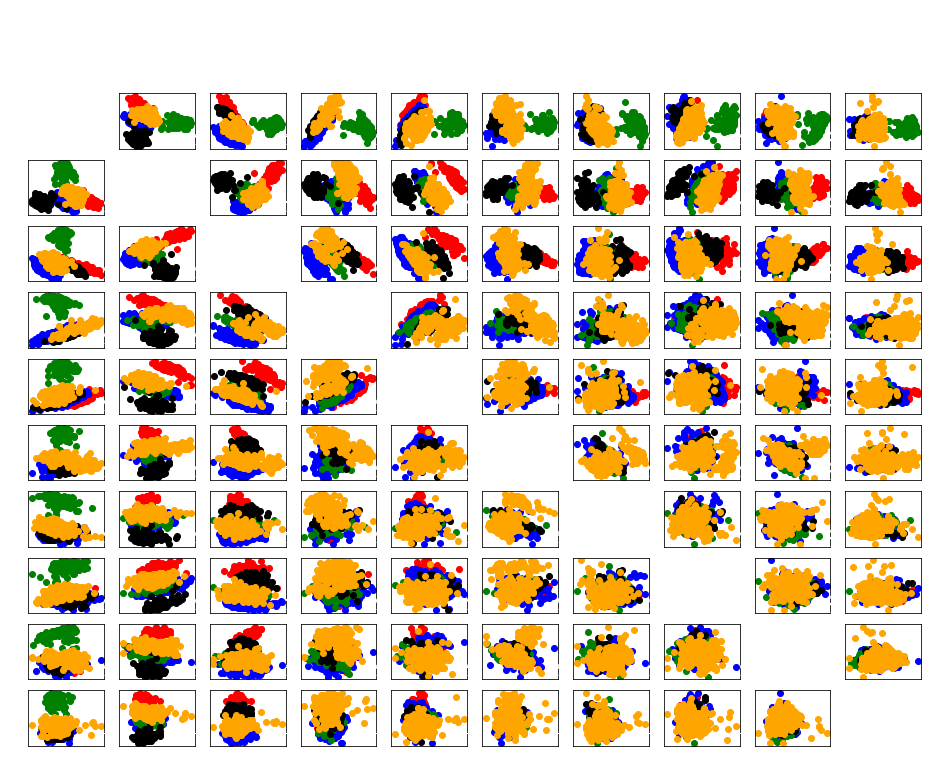

In [96]:
n_of_clusters = 5
GM_model = GaussianMixture(n_components=n_of_clusters)
GM_model.fit(principalComponents)
prediction = GM_model.predict(principalComponents)

if n_components > 2:
    fig = plt.figure(figsize=(16,12))
    plt.suptitle(f'{n_components=} GMM Clustering ', color='White')
    axes = fig.subplots(nrows=n_components, ncols=n_components)

    for x_index in range(n_components):
        for y_index in range(n_components):
            for cluster in range(n_of_clusters):
                cluster_indices = [idx for idx, label in enumerate(prediction) if cluster == label]
                if x_index == y_index:
                    axes[x_index, y_index].set_axis_off()
                else:
                    axes[x_index, y_index].scatter(principalComponents[cluster_indices, x_index], principalComponents[cluster_indices, y_index], color=colors[cluster])
            axes[x_index, y_index].set_yticks(())
            axes[x_index, y_index].set_xticks(())
            axes[x_index, y_index].set_xlabel(f'Principal component {x_index+1}', color='White') # <- Change the color before submission
            axes[x_index, y_index].set_ylabel(f'Principal component {y_index+1}', color='White')
    plt.show()
else:
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = principalComponents[:, 0].min() - 1, principalComponents[:, 0].max() + 1
    y_min, y_max = principalComponents[:, 1].min() - 1, principalComponents[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = GM_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(
        Z,
        interpolation="nearest",
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        cmap=plt.cm.Paired,
        aspect="auto",
        origin="lower",
    )

    plt.plot(principalComponents[:, 0], principalComponents[:, 1], "k.", markersize=2)
    # Plot the centroids as a white X

    plt.title(
        "GMM clustering on the digits dataset (PCA-reduced data, dim 2)\n"
        "Centroids are marked with white cross", color='White' # <- Change this before turning in, otherwise this text wille be invisible (unless they run darkmode)
    )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

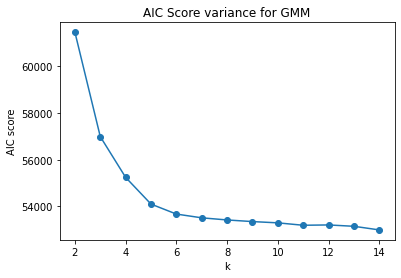

In [99]:
# Calculate the intra cluster variance for a range of cluster sizes and plot them (disclose which PCA size we use)
largest_cluster = 15
cluster_sizes = range(2, largest_cluster)
variance_sizes = np.zeros(len(cluster_sizes))
for _ in range(n_of_runs):
    for i, n_of_clusters in enumerate(cluster_sizes):
        n_of_clusters = cluster_sizes[i]
        GM_model = GaussianMixture(n_components=n_of_clusters)
        GM_model.fit(principalComponents)
        variance_sizes[i] += GM_model.aic(principalComponents)
        
variance_sizes /= n_of_runs


plt.plot(cluster_sizes, variance_sizes, 'o-')
plt.title('AIC Score variance for GMM')
plt.ylabel('AIC score')
plt.xlabel('k')
plt.show()

ALL THAT'S LEFT FOR TASK FOUR IS TO TRY TO SEE HOW GOOD THE MODEL IS, AND ALL NEEDED FOR THAT IS TO CONNECT WHAT CLUSTER (color) IN THE PCA PLOT CONNECTS TO WHICH CLUSTER SO I CAN FIGURE OUT HOW THAT WILL WORK. 

NEED TO FIGURE THAT OUT OTHERWISE THERE IS NO WAY TO TELL HOW GOOD THE MODEL IS (SINCE WE HAVE LABELED DATA TO COMPARE AGAINST)

MIGHT ALSO BE THAT WE NEED DIFFERENT CLUSTER SIZE ANALYSIS TOOLS BUT THAT WOULD JUST BE TO USE SOME DIFFERENT ONES (SIluotte, squared distances (which I have) and one more for KMEANS), (BIC, AIC and one more for GMM)